In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm
import seaborn as sns
import scipy as sc
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [57]:
file_path = "data/global_rad_technion_2017_2023.csv"
data = pd.read_csv(file_path,parse_dates=['date'])
data['avg_daily_radiation'] = data.mean(axis='columns',numeric_only=True)
data['date_column'] = pd.to_datetime(data['date'],format='mixed',dayfirst=True) #.dt.strftime('%d-%m-%Y')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          2546 non-null   object        
 1   radiation type                2546 non-null   object        
 2   קרינה שעתית 05-06 (וואט/מ"ר)  2545 non-null   float64       
 3   קרינה שעתית 06-07 (וואט/מ"ר)  2544 non-null   float64       
 4   קרינה שעתית 07-08 (וואט/מ"ר)  2544 non-null   float64       
 5   קרינה שעתית 08-09 (וואט/מ"ר)  2539 non-null   float64       
 6   קרינה שעתית 09-10 (וואט/מ"ר)  2538 non-null   float64       
 7   קרינה שעתית 10-11 (וואט/מ"ר)  2539 non-null   float64       
 8   קרינה שעתית 11-12 (וואט/מ"ר)  2537 non-null   float64       
 9   קרינה שעתית 12-13 (וואט/מ"ר)  2537 non-null   float64       
 10  קרינה שעתית 13-14 (וואט/מ"ר)  2539 non-null   float64       
 11  קרינה שעתית 14-15 (וואט/מ"ר)  

In [58]:
mini_data = data[['date_column','avg_daily_radiation']].set_index('date_column')
mini_data.head()

,avg_daily_radiation
date_column,
2017-01-01,204.000000
2017-01-02,141.642857
2017-01-03,220.428571
2017-01-04,167.928571
2017-01-05,193.928571


#### Seasonal Decomposition

In [59]:
df = mini_data

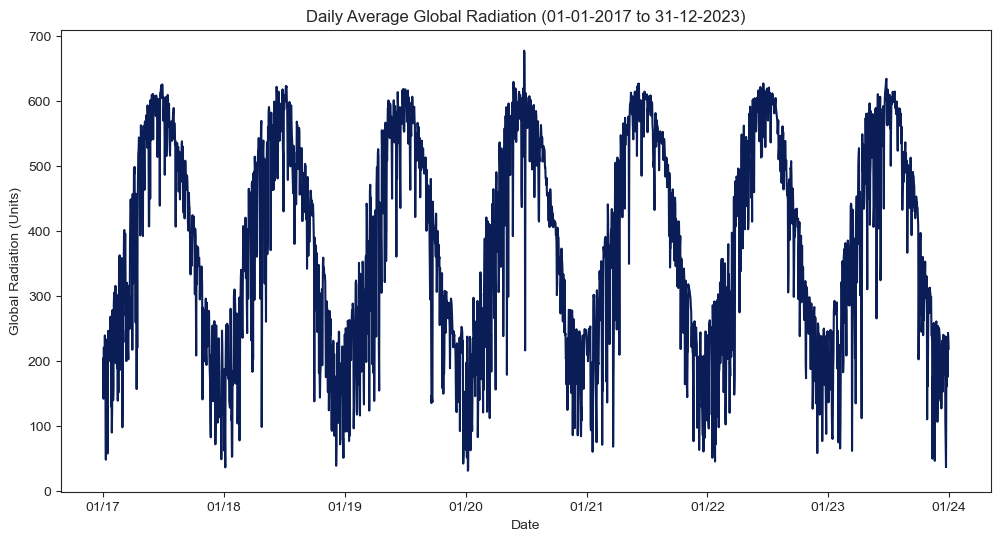

In [71]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['avg_daily_radiation'], color='#0A1D56')
plt.title('Daily Average Global Radiation (01-01-2017 to 31-12-2023)')
plt.xlabel('Date')
plt.ylabel('Global Radiation (Units)')
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) #MonthLocator(bymonthday=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))

plt.show()

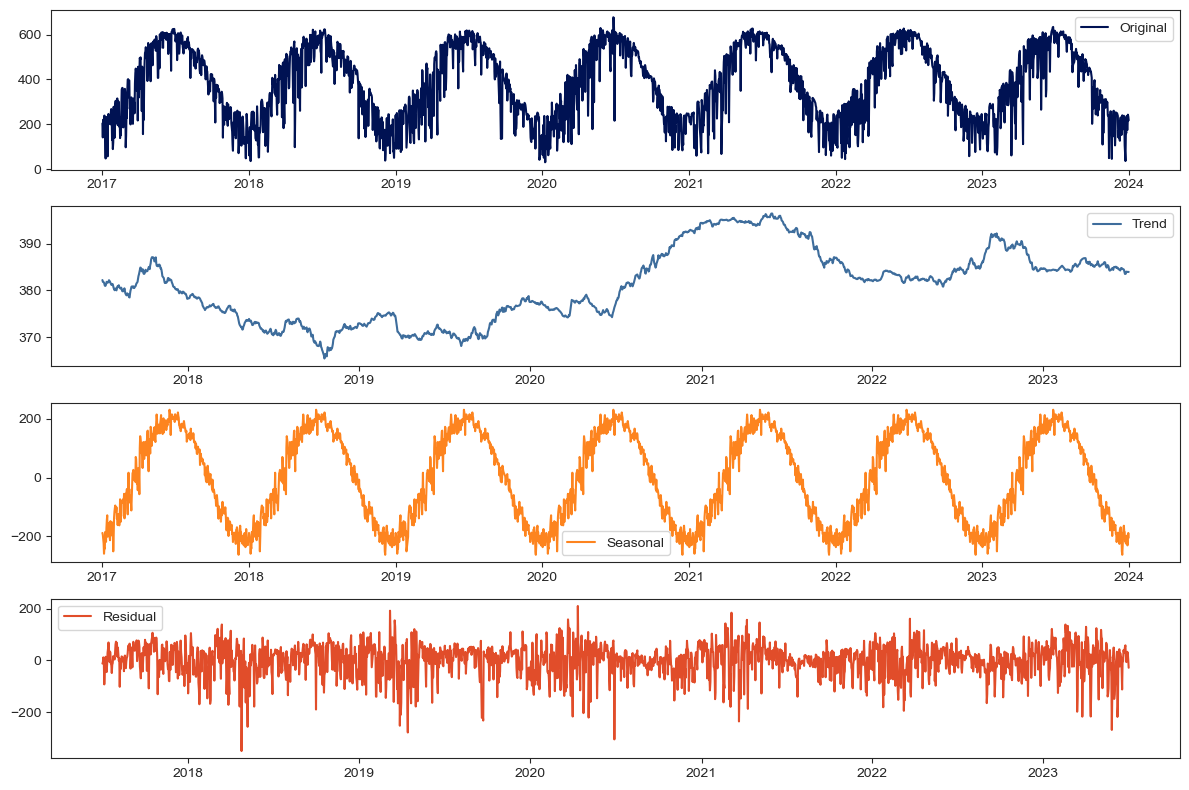

In [72]:
decomposition = seasonal_decompose(df['avg_daily_radiation'], period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df.index, df['avg_daily_radiation'], label='Original', color='#001253') #darknavy
plt.legend(loc='best')
plt.subplot(412)
plt.plot(df.index, trend, label='Trend', color='#3E6D9C') #mid_blue
plt.legend(loc='best')
plt.subplot(413)
plt.plot(df.index, seasonal, label='Seasonal', color='#FD841F') #mid_orange
plt.legend(loc='best')
plt.subplot(414)
plt.plot(df.index, residual, label='Residual', color='#E14D2A') #dark_orange
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

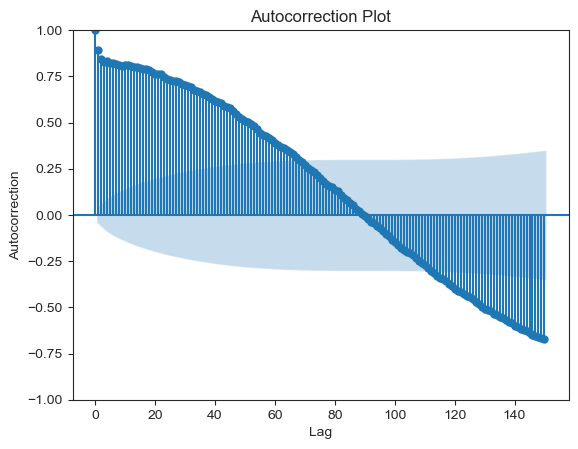

In [48]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(df['avg_daily_radiation'], lags=150)
plt.title('Autocorrection Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrection')
plt.show()